# Task 2.1: ARMA

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import pandas as pd
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from helper import *

### Load data

In [11]:
# Load data
df = pd.read_csv("../data/training1_no_incidents.csv")
df['DATETIME'] = pd.to_datetime(df['DATETIME'])
df.set_index('DATETIME', inplace=True)

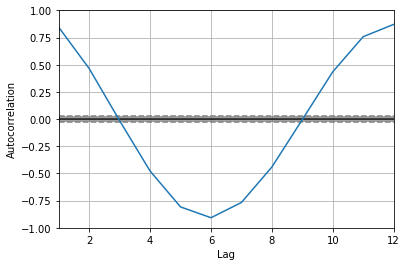

In [12]:
autocorrelation_plot(df['L_T3'], 12)
plt.show()

### As can be seen in this plot, the correlations that are perhaps significant are limited to the first 11 lags. As a result, a good starting point for the AR parameter is 11. 


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.L_T3   No. Observations:                 8760
Model:                ARIMA(11, 1, 0)   Log Likelihood                3809.906
Method:                       css-mle   S.D. of innovations              0.157
Date:                Tue, 04 Jun 2019   AIC                          -7593.812
Time:                        16:48:26   BIC                          -7501.799
Sample:                             1   HQIC                         -7562.460
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.575e-06      0.001     -0.019      0.985      -0.001       0.001
ar.L1.D.L_T3      0.2318      0.011     21.708      0.000       0.211       0.253
ar.L2.D.L_T3     -0.3498      0.011    -

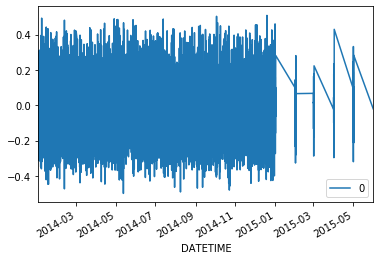

In [13]:
model = ARIMA(df['L_T3'], order = (11,1,0))
model_fit = model.fit(disp = 0)
print(model_fit.summary())
residual = DataFrame(model_fit.resid)
residual.plot()